In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

/tmp/ipykernel_61860/1256517549.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import mplhep as hep
import os
import optparse
import os.path as osp
import math
import torch_geometric
import torch
import sys
from tqdm import tqdm as tqdm
#import pandas as pd
from torch_geometric.data import Data
import glob

In [18]:
inpath_pi = "/grid_mnt/data__data.polcms/cms/sghosh/NEWPID_TICLDUMPER_DATA/ntup_pi_21052024/"
loadfile_pi = torch.load(inpath_pi + "data_0.pt")

In [19]:
inpath_pho = "/grid_mnt/data__data.polcms/cms/sghosh/NEWPID_TICLDUMPER_DATA/ntup_pho_21052024/"
loadfile_pho = torch.load(inpath_pho + "data_0.pt")

In [20]:
loadfile_pi[0]

Data(clus2d_feat=[91, 6], clus3d_feat=[6], gun_feat=[5])

In [21]:
loadfile_pho[0]

Data(clus2d_feat=[23, 6], clus3d_feat=[6], gun_feat=[5])

In [22]:
### old samples

## clus2d_feat - clusX,clusY,clusZ,clusE,clusT,clusL : Layer Cluster properties
## gun_feat - trkguneta,trkgunphi,trkgunen : Gun properties eta,phi,energy
## clus3d_feat - trkcluseta,trkclusphi,trkclusen,trkclustime, min(clusL),max(clusL) : trackster eta,phi,energy,time,min_layer,max_layer


### new samples
#### gun_feat : Gun properties
# - cpeta = calo particle eta
# - cpphi = calo particle phi
# - cpen  = calo particle energy in the EM part of HGCal
# - cpent = calo particle total energy
# - rat   = ratio between EM part of the trackster and the energy of the calo particle (which is already in the EM part)

#### clus2d_feat - clusX,clusY,clusZ,clusE,clusT,clusL : Layer Cluster properties
# - position_x
# - position y
# - position_z
# - energy
# - cluster_time
# - cluster_layer_id

#### clus3d_feat - trkcluseta,trkclusphi,trkclusen,trkclustime, min(clusL),max(clusL) : trackster eta,phi,energy,time,min_layer,max_layer
# - eta
# - phi
# - energy
# - time
# - min cluster layer
# - max cluster layer

for trackster in loadfile_pho:
    trackster.clus2d_feat ## lead LC properties
    #---do something---#

In [23]:
for tr in loadfile_pi:
    tr.gun_feat[3]

In [24]:
torch.__version__

'1.13.1'

In [25]:
torch_geometric.__version__

'2.3.0'

## Plot test pho

In [26]:
loadfile_pho[0] # loading the first event of the file

Data(clus2d_feat=[23, 6], clus3d_feat=[6], gun_feat=[5])

In [27]:
loadfile_pho[0].clus3d_feat #showing the features of the trackster of the first event

tensor([  1.6986,   1.8723, 221.0515,  12.6930,   1.0000,  25.0000])

In [28]:
loadfile_pho[0].clus2d_feat[0] # showing the features of the first LayerCluster of the first event

tensor([-3.8313e+01,  1.1557e+02,  3.2215e+02,  9.1929e-02, -9.9000e+01,
         1.0000e+00])

In [29]:
len(loadfile_pho) # the photon file has 200 events

97

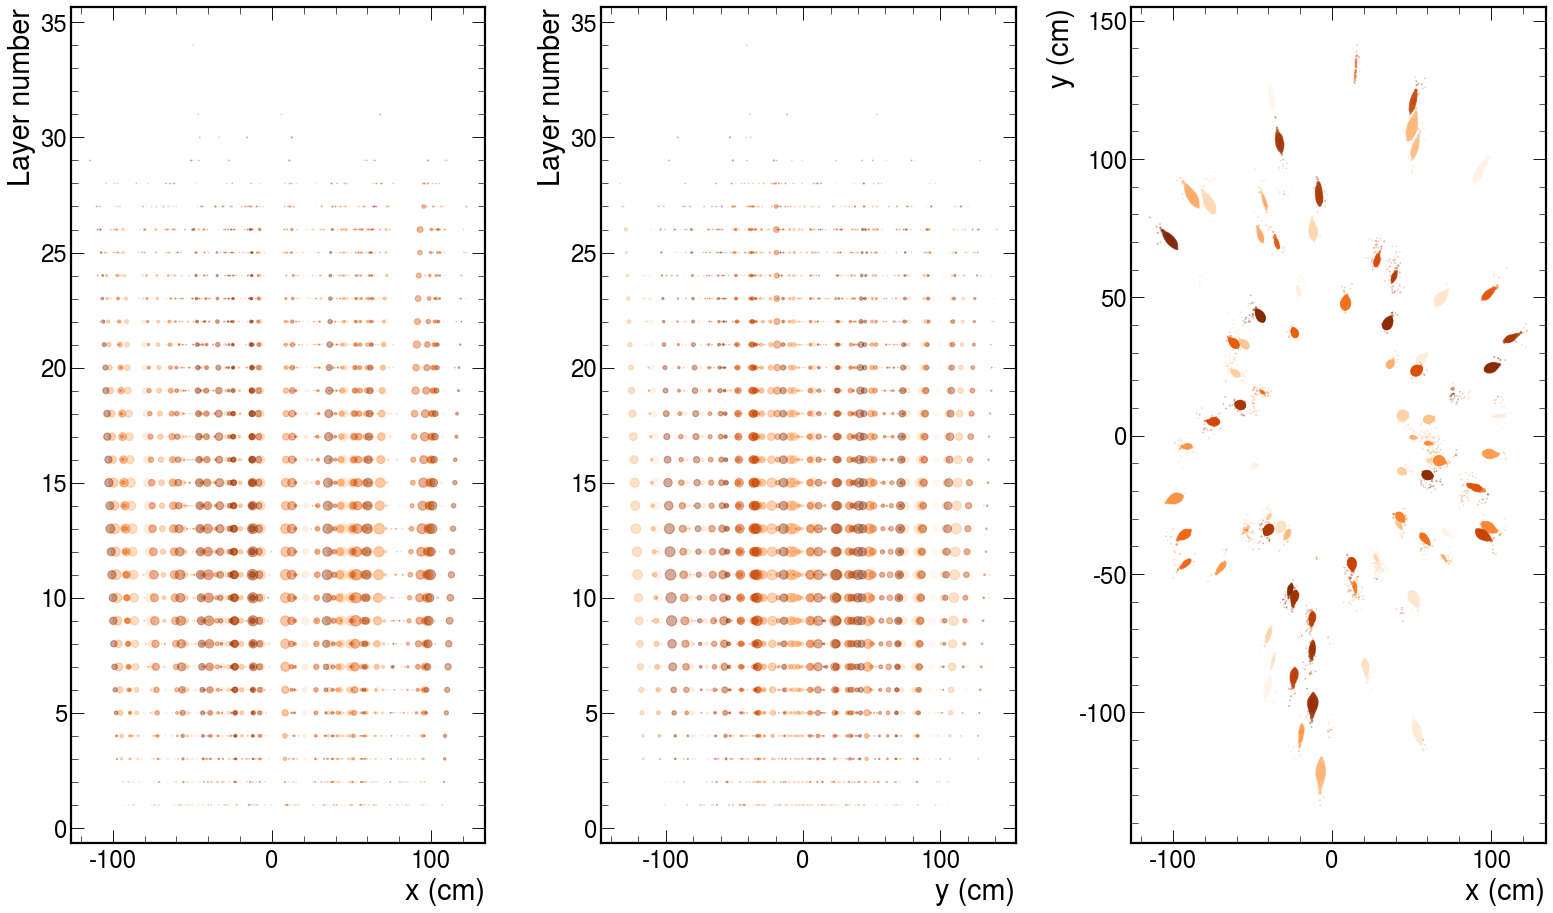

In [30]:
plt.style.use(hep.style.CMS)

fig, axs = plt.subplots(1, 3, figsize=(20,12),dpi=80)

# --- fancy colors for the plot
# get the color map
colormap = plt.colormaps.get_cmap('Oranges')
# number of colors = number of events
num_colors = len(loadfile_pho)
# Create the color palette by sampling colors from the colormap
color_palette = [colormap(i) for i in np.linspace(0, 1, num_colors)]
#print(color_palette) # it returns (r,g,b,a), where a is in [0,1]


## counter for color list
i_colors = 0

# loop over all the events
for ins in loadfile_pho:

    # sample = matrix of all the LayerClusters in the file (number of rows)
    #          with their features (number of columns)
    # LayerCluster features: clusX,clusY,clusZ,clusE,clusT,clusL
    # there is one matrix of this kind for each event of the loadfile_pho
    sample = ins.clus2d_feat
    #print('AAA')
    #print( sample )


    # --- Layer number vs x scatter plot
    # - sample[:,0] = takes the element 0 of every row, so the clusX
    # - sample[:,5] = takes the element 5 of every row, so the Layer number
    # - the s parameter set the size of the marker point
    #   and in this case the size is set proportional to the LayerCluster energy (element 3 of every row)
    # - the color is the same for all the 2D cluster in each event: every event has a different color
    #   (if one wanted, one could give to color dimension of the plot meaning connected to the amount of energy
    #   of each cluster, for e.g. To do this, one would need to add as options: c=sample[:,3], cmap=colormap)
    axs[0].scatter(sample[:,0],sample[:,5],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[0].set_xlabel('x (cm)')
    axs[0].set_ylabel('Layer number')
    # --- Layer number vs y scatter plot
    axs[1].scatter(sample[:,1],sample[:,5],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[1].set_xlabel('y (cm)')
    axs[1].set_ylabel('Layer number')
    # --- y vs x scatter plot
    axs[2].scatter(sample[:,0],sample[:,1],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[2].set_xlabel('x (cm)')
    axs[2].set_ylabel('y (cm)')

    #plt.show()

    i_colors = i_colors +1 ## counter for color list


    #hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='')
    #hep.cms.label(lumi=50)



plt.tight_layout()
plt.show()

## Plot test Pi

In [31]:
loadfile_pi[0]

Data(clus2d_feat=[91, 6], clus3d_feat=[6], gun_feat=[5])

In [32]:
len(loadfile_pi)

73

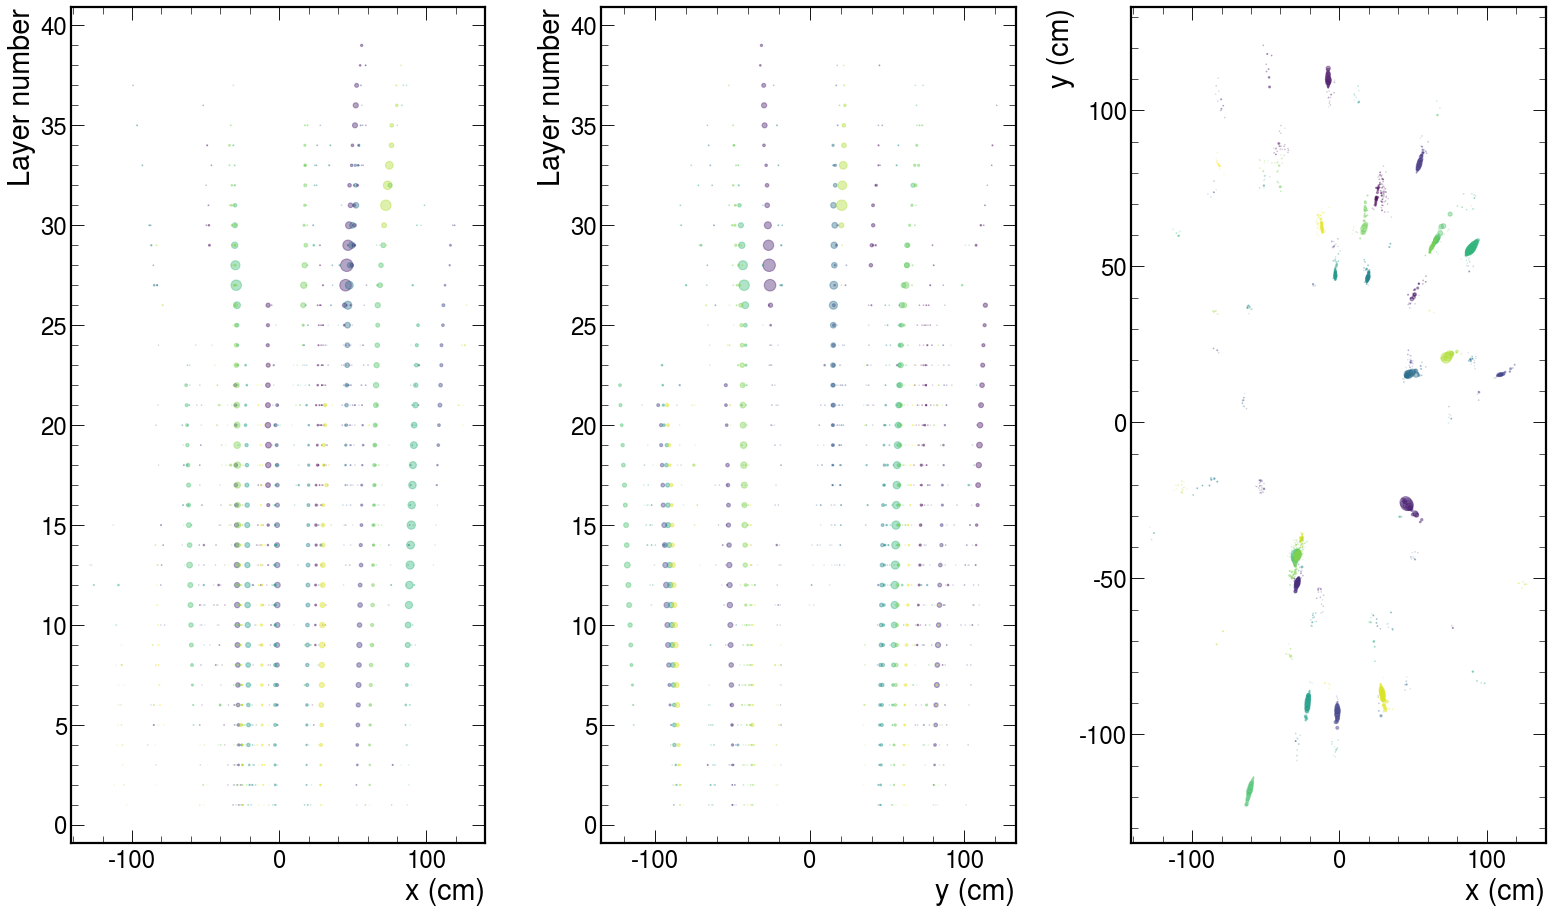

In [33]:
plt.style.use(hep.style.CMS)

fig, axs = plt.subplots(1, 3, figsize=(20,12),dpi=80)

# --- fancy colors for the plot
# get the color map
colormap = plt.colormaps.get_cmap('viridis')
# number of colors = number of events
num_colors = len(loadfile_pi)
# Create the color palette by sampling colors from the colormap
color_palette = [colormap(i) for i in np.linspace(0, 1, num_colors)]
#print(color_palette) # it returns (r,g,b,a), where a is in [0,1]


## counter for color list
i_colors = 0

# loop over all the events
for ins in loadfile_pi:

    # sample = matrix of all the LayerClusters in the file (number of rows)
    #          with their features (number of columns)
    # LayerCluster features: clusX,clusY,clusZ,clusE,clusT,clusL
    # there is one matrix of this kind for each event of the loadfile_pi
    sample = ins.clus2d_feat
    #print('AAA')
    #print( sample )


    # --- Layer number vs x scatter plot
    # - sample[:,0] = takes the element 0 of every row, so the clusX
    # - sample[:,5] = takes the element 5 of every row, so the Layer number
    # - the s parameter set the size of the marker point
    #   and in this case the size is set proportional to the LayerCluster energy (element 3 of every row)
    # - the color is the same for all the 2D cluster in each event: every event has a different color
    #   (if one wanted, one could give to color dimension of the plot meaning connected to the amount of energy
    #   of each cluster, for e.g. To do this, one would need to add as options: c=sample[:,3], cmap=colormap)
    axs[0].scatter(sample[:,0],sample[:,5],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[0].set_xlabel('x (cm)')
    axs[0].set_ylabel('Layer number')
    # --- Layer number vs y scatter plot
    axs[1].scatter(sample[:,1],sample[:,5],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[1].set_xlabel('y (cm)')
    axs[1].set_ylabel('Layer number')
    # --- y vs x scatter plot
    axs[2].scatter(sample[:,0],sample[:,1],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[2].set_xlabel('x (cm)')
    axs[2].set_ylabel('y (cm)')

    #plt.show()

    i_colors = i_colors +1 ## counter for color list


    #hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='')
    #hep.cms.label(lumi=50)



plt.tight_layout()
plt.show()

## Plot 3D trackster features

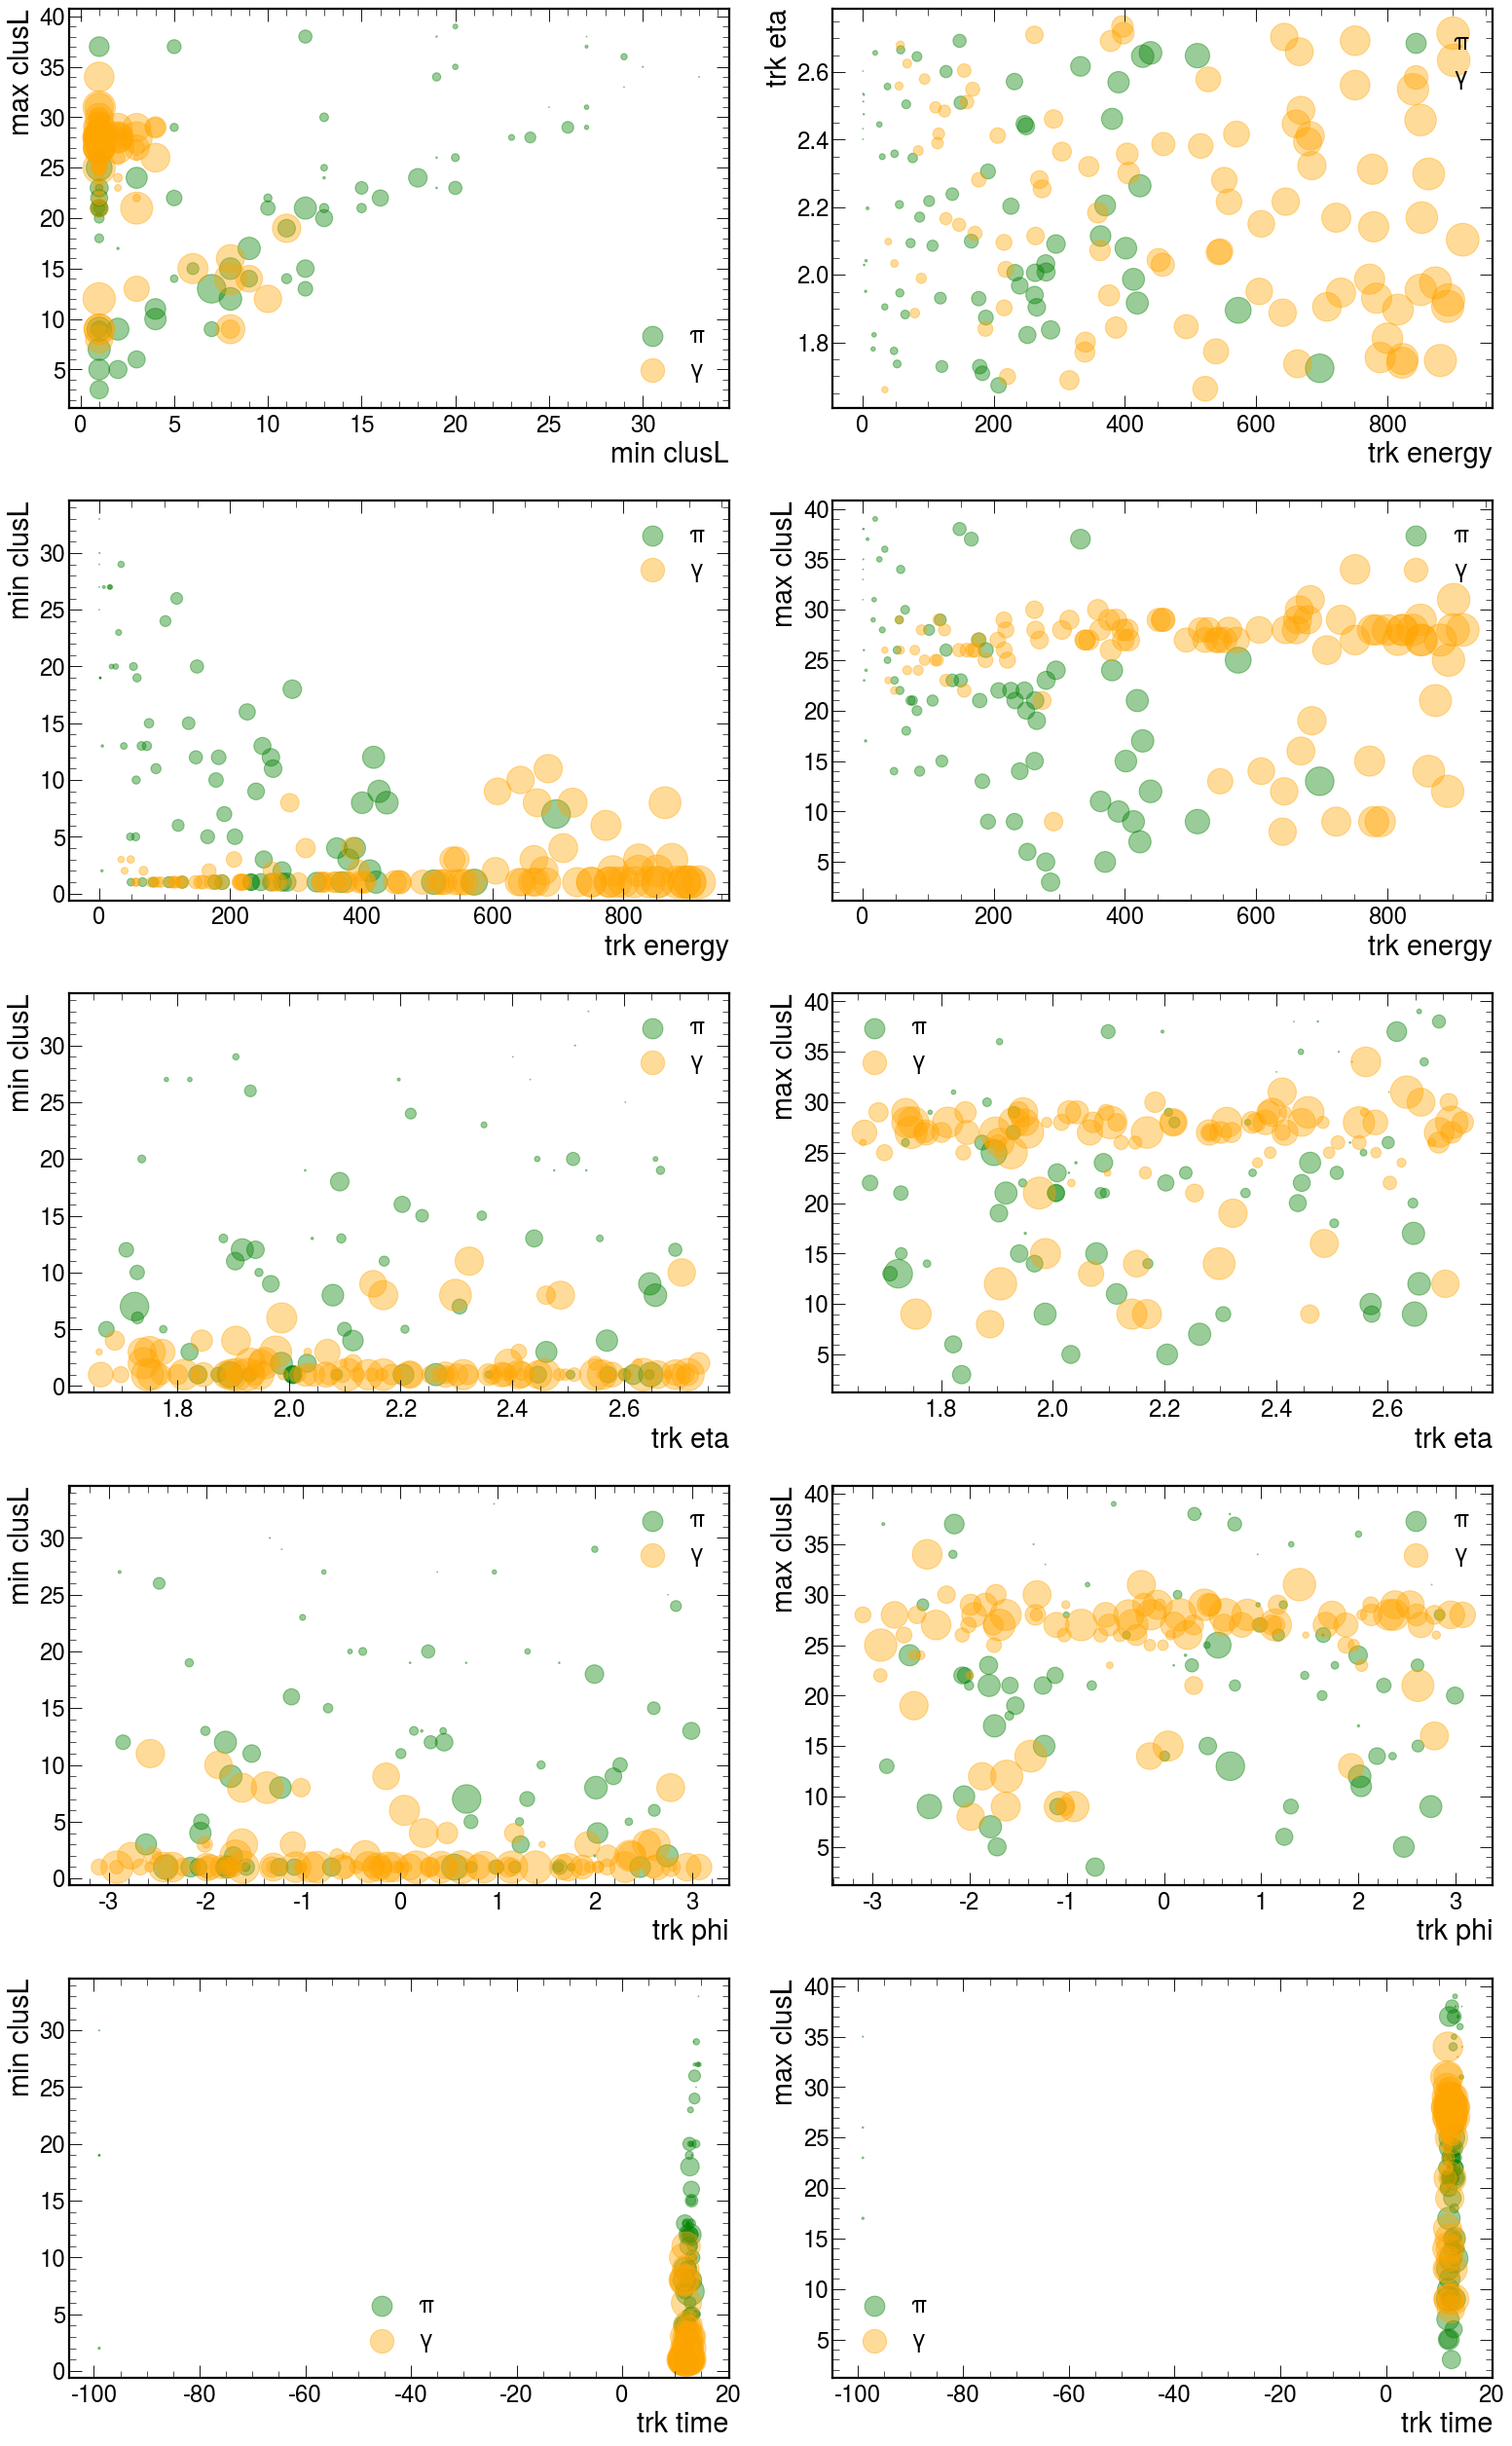

In [34]:
plt.style.use(hep.style.CMS)

fig, axs = plt.subplots(5, 2, figsize=(20,32), dpi=80)


# def arrays - for pions
# the clus3d_feat is a tensor of only 6 features (an array basically ?)
# the .item() extract the item value from the tensor
arr_trkcluseta_pi  = [ins.clus3d_feat[0].item() for ins in loadfile_pi]
arr_trkclusphi_pi  = [ins.clus3d_feat[1].item() for ins in loadfile_pi]
arr_trkclusen_pi   = [ins.clus3d_feat[2].item() for ins in loadfile_pi]
arr_trkclustime_pi = [ins.clus3d_feat[3].item() for ins in loadfile_pi]
arr_minL_pi = [ins.clus3d_feat[4].item() for ins in loadfile_pi]
arr_maxL_pi = [ins.clus3d_feat[5].item() for ins in loadfile_pi]

# def arrays - for photons
# the clus3d_feat is a tensor of only 6 features (an array basically ?)
# the .item() extract the item value from the tensor
arr_trkcluseta_pho  = [ins1.clus3d_feat[0].item() for ins1 in loadfile_pho]
arr_trkclusphi_pho  = [ins1.clus3d_feat[1].item() for ins1 in loadfile_pho]
arr_trkclusen_pho   = [ins1.clus3d_feat[2].item() for ins1 in loadfile_pho]
arr_trkclustime_pho = [ins1.clus3d_feat[3].item() for ins1 in loadfile_pho]
arr_minL_pho = [ins1.clus3d_feat[4].item() for ins1 in loadfile_pho]
arr_maxL_pho = [ins1.clus3d_feat[5].item() for ins1 in loadfile_pho]


# plots
axs[0][0].scatter(arr_minL_pi,  arr_maxL_pi,  s=arr_trkclusen_pi,  color="green",  alpha=0.4, label=r'$\pi$')
axs[0][0].scatter(arr_minL_pho, arr_maxL_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[0][0].legend()
axs[0][0].set_xlabel('min clusL')
axs[0][0].set_ylabel('max clusL')
axs[0][1].scatter(arr_trkclusen_pi,  arr_trkcluseta_pi,  s=arr_trkclusen_pi,  color="green",  alpha=0.4, label=r'$\pi$')
axs[0][1].scatter(arr_trkclusen_pho, arr_trkcluseta_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[0][1].legend()
axs[0][1].set_xlabel('trk energy')
axs[0][1].set_ylabel('trk eta')
# min max L vs energy
axs[1][0].scatter(arr_trkclusen_pi, arr_minL_pi,  s=arr_trkclusen_pi,  color="green", alpha=0.4, label=r'$\pi$')
axs[1][0].scatter(arr_trkclusen_pho,arr_minL_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[1][0].legend()
axs[1][0].set_xlabel('trk energy')
axs[1][0].set_ylabel('min clusL')
axs[1][1].scatter(arr_trkclusen_pi,  arr_maxL_pi,  s=arr_trkclusen_pi,  color="green", alpha=0.4, label=r'$\pi$')
axs[1][1].scatter(arr_trkclusen_pho, arr_maxL_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[1][1].legend()
axs[1][1].set_xlabel('trk energy')
axs[1][1].set_ylabel('max clusL')
# min max L vs eta
axs[2][0].scatter(arr_trkcluseta_pi,  arr_minL_pi,  s=arr_trkclusen_pi,  color="green", alpha=0.4, label=r'$\pi$')
axs[2][0].scatter(arr_trkcluseta_pho, arr_minL_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[2][0].legend()
axs[2][0].set_xlabel('trk eta')
axs[2][0].set_ylabel('min clusL')
axs[2][1].scatter(arr_trkcluseta_pi,  arr_maxL_pi,  s=arr_trkclusen_pi,  color="green", alpha=0.4, label=r'$\pi$')
axs[2][1].scatter(arr_trkcluseta_pho, arr_maxL_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[2][1].legend()
axs[2][1].set_xlabel('trk eta')
axs[2][1].set_ylabel('max clusL')
# min max L vs phi
axs[3][0].scatter(arr_trkclusphi_pi,  arr_minL_pi,  s=arr_trkclusen_pi,  color="green", alpha=0.4, label=r'$\pi$')
axs[3][0].scatter(arr_trkclusphi_pho, arr_minL_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[3][0].legend()
axs[3][0].set_xlabel('trk phi')
axs[3][0].set_ylabel('min clusL')
axs[3][1].scatter(arr_trkclusphi_pi,  arr_maxL_pi,  s=arr_trkclusen_pi,  color="green", alpha=0.4, label=r'$\pi$')
axs[3][1].scatter(arr_trkclusphi_pho, arr_maxL_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[3][1].legend()
axs[3][1].set_xlabel('trk phi')
axs[3][1].set_ylabel('max clusL')
# min max L vs time
axs[4][0].scatter(arr_trkclustime_pi,  arr_minL_pi,  s=arr_trkclusen_pi,  color="green", alpha=0.4, label=r'$\pi$')
axs[4][0].scatter(arr_trkclustime_pho, arr_minL_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[4][0].legend()
axs[4][0].set_xlabel('trk time')
axs[4][0].set_ylabel('min clusL')
axs[4][1].scatter(arr_trkclustime_pi,  arr_maxL_pi,  s=arr_trkclusen_pi,  color="green", alpha=0.4, label=r'$\pi$')
axs[4][1].scatter(arr_trkclustime_pho, arr_maxL_pho, s=arr_trkclusen_pho, color="orange", alpha=0.4, label=r'$\gamma$')
axs[4][1].legend()
axs[4][1].set_xlabel('trk time')
axs[4][1].set_ylabel('max clusL')


#plt.legend()
plt.tight_layout()
plt.show()

# Plot Gun features 

(73, 5)
(97, 5)


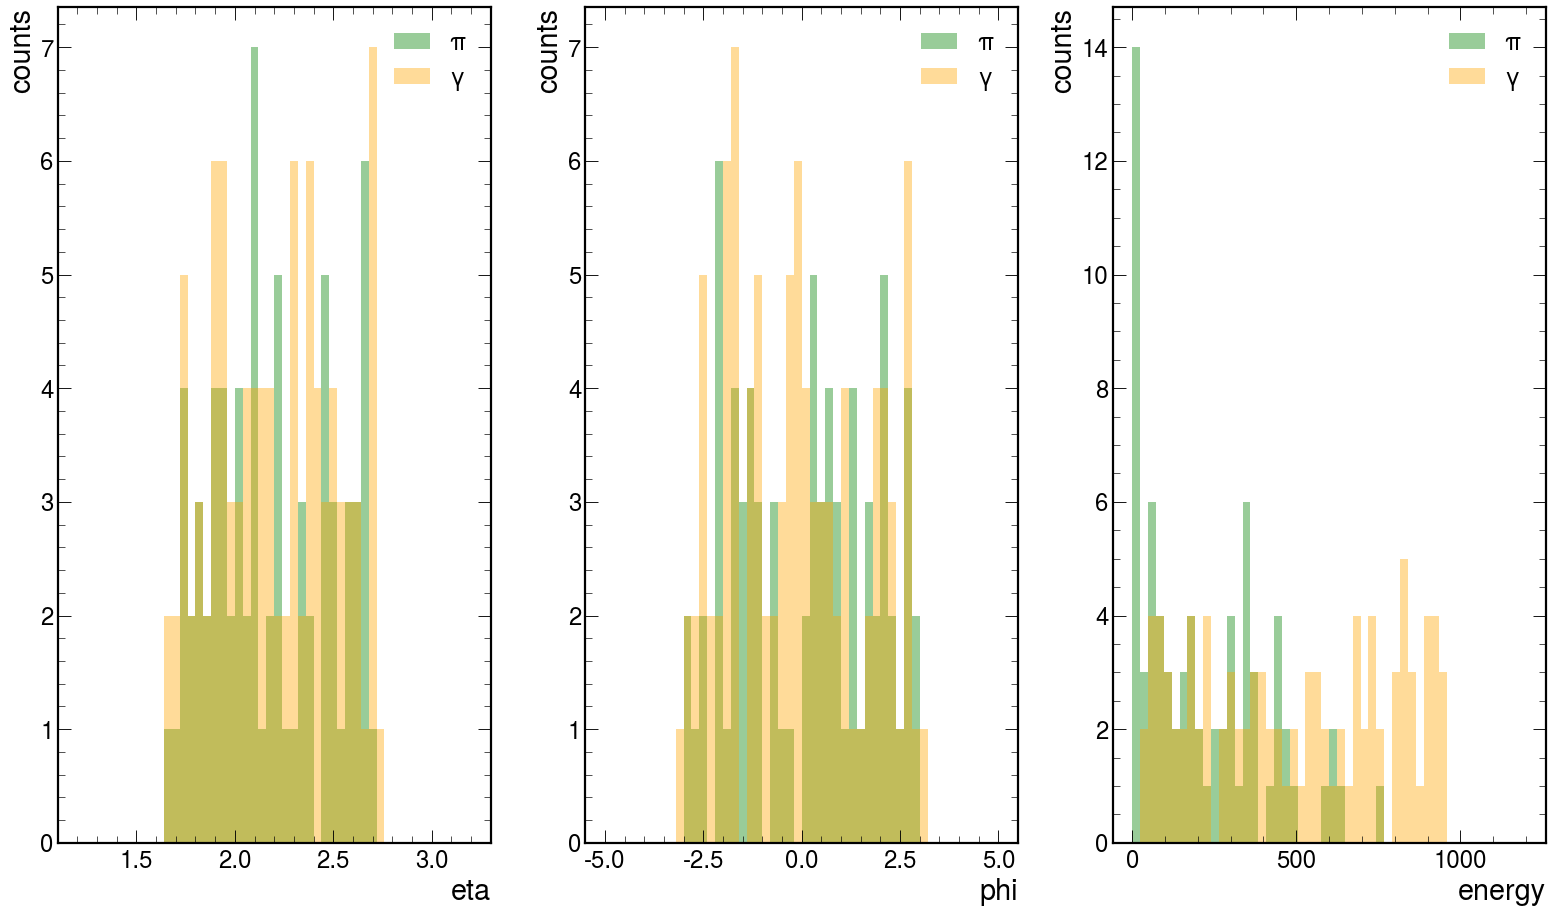

In [35]:
# --- pions
gun_matrix_pi = [ ]
for i_evt_pi in loadfile_pi:
    gun_matrix_pi.append(i_evt_pi.gun_feat.numpy())

#print(gun_matrix_pi)
gun_matrix_pi = np.vstack(gun_matrix_pi)
#print(gun_matrix_pi)
print(gun_matrix_pi.shape)

# --- photons
gun_matrix_pho = [ ]
for i_evt_pho in loadfile_pho:
    gun_matrix_pho.append(i_evt_pho.gun_feat.numpy())

gun_matrix_pho = np.vstack(gun_matrix_pho)
print(gun_matrix_pho.shape)


fig, axs = plt.subplots(1, 3, figsize=(20,12),dpi=80)
#plot eta
axs[0].hist(gun_matrix_pi[:,0], bins=50, range=(1.2,3.2), histtype='bar', color='green', alpha=0.4, label=r'$\pi$')
axs[0].hist(gun_matrix_pho[:,0], bins=50, range=(1.2,3.2), histtype='bar', color='orange', alpha=0.4, label=r'$\gamma$')
axs[0].legend()
axs[0].set_xlabel('eta')
axs[0].set_ylabel('counts')
#plot phi
axs[1].hist(gun_matrix_pi[:,1], bins=50, range=(-5,5), histtype='bar', color='green', alpha=0.4, label=r'$\pi$')
axs[1].hist(gun_matrix_pho[:,1], bins=50, range=(-5,5), histtype='bar', color='orange', alpha=0.4, label=r'$\gamma$')
axs[1].legend()
axs[1].set_xlabel('phi')
axs[1].set_ylabel('counts')
#plot energy
axs[2].hist(gun_matrix_pi[:,2], bins=50, range=(0,1200), histtype='bar', color='green', alpha=0.4, label=r'$\pi$')
axs[2].hist(gun_matrix_pho[:,2], bins=50, range=(0,1200), histtype='bar', color='orange', alpha=0.4, label=r'$\gamma$')
axs[2].legend()
axs[2].set_xlabel('energy')
axs[2].set_ylabel('counts')


plt.tight_layout()
plt.show()


## To load all files, all events

pions

In [36]:
inpath_pi_files = "/grid_mnt/data__data.polcms/cms/sghosh/NEWPID_DATA/ntup_pi_frac0p8/"
filenamelist_pi = [ filename for filename in glob.glob( inpath_pi_files + 'data_*.pt' )]
data_list_pi    = []
for i_pi in tqdm( filenamelist_pi ):
    idx_pi = torch.load(i_pi)
    data_list_pi.append(idx_pi)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:03<00:00, 29.89it/s]


photons

In [37]:
inpath_pho_files = "/grid_mnt/data__data.polcms/cms/sghosh/NEWPID_DATA/ntup_pho_frac0p8/"
filenamelist_pho = [ filename for filename in glob.glob( inpath_pho_files + 'data_*.pt' )]
data_list_pho    = []
for i_pho in tqdm( filenamelist_pho ):
    idx_pho = torch.load(i_pho)
    data_list_pho.append(idx_pho)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 20.10it/s]


## energy 

Text(0, 1, 'Energy')

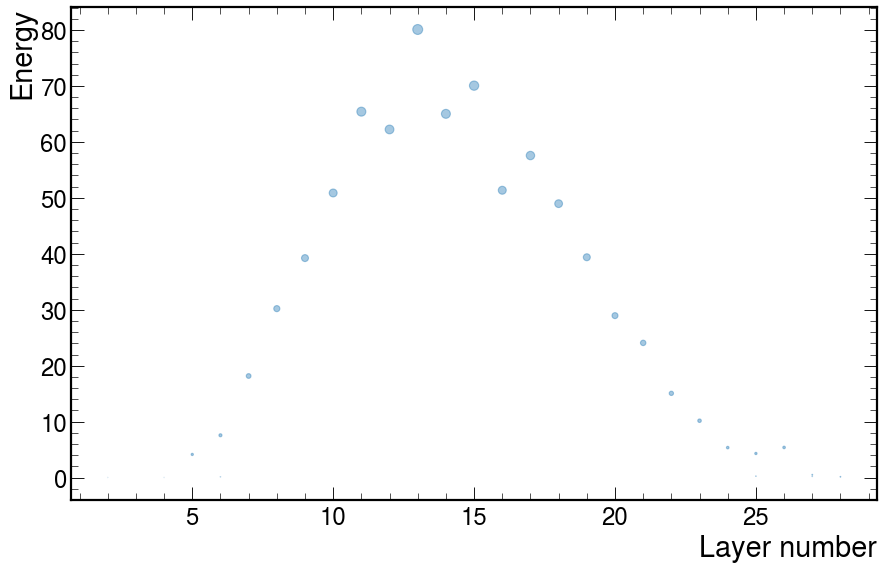

In [38]:
fig, ax = plt.subplots(1,1, figsize=(13,8), dpi=80)


# stupid way
sample = loadfile_pho[75].clus2d_feat

ax.scatter(sample[:,5],sample[:,3],s=sample[:,3], alpha=0.4)
ax.set_xlabel('Layer number')
ax.set_ylabel('Energy')